<a href="https://colab.research.google.com/github/Vasudev-SN/MPEA_dataset/blob/master/Assignment_1_regression_168.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('power_plant.csv')

In [ ]:
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [ ]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.isna().sum().sum()

0

In [ ]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [ ]:
  df.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
X=df.drop(['PE'],axis=1).values
y=df['PE'].values

In [ ]:
X

array([[  14.96,   41.76, 1024.07,   73.17],
       [  25.18,   62.96, 1020.04,   59.08],
       [   5.11,   39.4 , 1012.16,   92.14],
       ...,
       [  31.32,   74.33, 1012.92,   36.48],
       [  24.48,   69.45, 1013.86,   62.39],
       [  21.6 ,   62.52, 1017.23,   67.87]])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
model1 = Sequential()
model1.add(Dense(units=6, input_dim=4, activation='relu'))
model1.add(Dense(units=1, activation='linear'))
model1.compile(loss='mean_squared_error', optimizer='adam',metrics=['mae'])


In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 30        
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history1 = model1.fit(X_train, y_train, epochs=20, batch_size=25, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
307/307 [==============================] - 2s 3ms/step - loss: 206652.9531 - mae: 454.2728 - val_loss: 206095.0000 - val_mae: 453.6325
Epoch 2/20
307/307 [==============================] - 1s 2ms/step - loss: 204737.1562 - mae: 452.0956 - val_loss: 203795.1719 - val_mae: 450.9996
Epoch 3/20
307/307 [==============================] - 1s 2ms/step - loss: 201845.3281 - mae: 448.7548 - val_loss: 200408.6406 - val_mae: 447.0522
Epoch 4/20
307/307 [==============================] - 1s 2ms/step - loss: 197863.6406 - mae: 444.0580 - val_loss: 196030.1562 - val_mae: 441.8255
Epoch 5/20
307/307 [==============================] - 1s 2ms/step - loss: 192970.5781 - mae: 438.1250 - val_loss: 190854.0000 - val_mae: 435.4548
Epoch 6/20
307/307 [==============================] - 1s 2ms/step - loss: 187387.7188 - mae: 431.1219 - val_loss: 185135.9062 - val_mae: 428.1519
Epoch 7/20
307/307 [==============================] - 1s 2ms/step - loss: 181338.9375 - mae: 423.2162 - val_loss: 179033.390

In [ ]:
mse, mae = model1.evaluate(X_test, y_test)
print("MSE:", mse)
print("MAE:", mae)

60/60 [==============================] - 0s 2ms/step - loss: 118725.9688 - mae: 301.6106
MSE: 118725.96875
MAE: 301.610595703125


In [ ]:
history1

In [ ]:
model2 = Sequential()
model2.add(Dense(6, input_dim=4, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(1, activation='linear'))
model2.compile(loss='mean_squared_error', optimizer='adam',metrics=['mae'])

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 6)                 30        
                                                                 
 dense_3 (Dense)             (None, 10)                70        
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history2 = model2.fit(X_train, y_train, epochs=20, batch_size=25, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
307/307 [==============================] - 2s 3ms/step - loss: 201864.1875 - mae: 448.9323 - val_loss: 180140.4375 - val_mae: 424.1972
Epoch 2/20
307/307 [==============================] - 1s 2ms/step - loss: 79269.7031 - mae: 250.9277 - val_loss: 15386.2090 - val_mae: 101.7241
Epoch 3/20
307/307 [==============================] - 1s 3ms/step - loss: 11783.3135 - mae: 88.9440 - val_loss: 8101.3423 - val_mae: 74.3475
Epoch 4/20
307/307 [==============================] - 1s 4ms/step - loss: 5889.9824 - mae: 62.9897 - val_loss: 3763.9443 - val_mae: 50.7328
Epoch 5/20
307/307 [==============================] - 1s 4ms/step - loss: 2690.6997 - mae: 42.9280 - val_loss: 1684.5760 - val_mae: 34.0560
Epoch 6/20
307/307 [==============================] - 1s 3ms/step - loss: 1261.1802 - mae: 29.3050 - val_loss: 834.7872 - val_mae: 23.7627
Epoch 7/20
307/307 [==============================] - 1s 3ms/step - loss: 690.3120 - mae: 21.1363 - val_loss: 500.5754 - val_mae: 17.3895
Epoch 8/20
3

In [ ]:
mse, mae = model2.evaluate(X_test, y_test)
print("MSE:", mse)
print("MAE:", mae)

60/60 [==============================] - 0s 2ms/step - loss: 22.5585 - mae: 3.7334
MSE: 22.558530807495117
MAE: 3.733428478240967


In [ ]:
import matplotlib.pyplot as plt

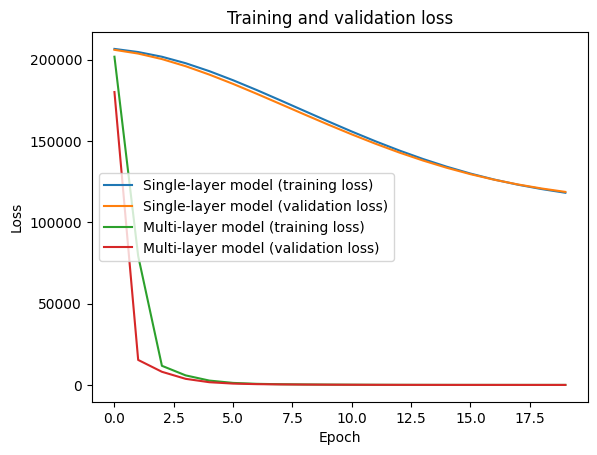

In [ ]:
plt.plot(history1.history['loss'], label='Single-layer model (training loss)')
plt.plot(history1.history['val_loss'], label='Single-layer model (validation loss)')
plt.plot(history2.history['loss'], label='Multi-layer model (training loss)')
plt.plot(history2.history['val_loss'], label='Multi-layer model (validation loss)')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

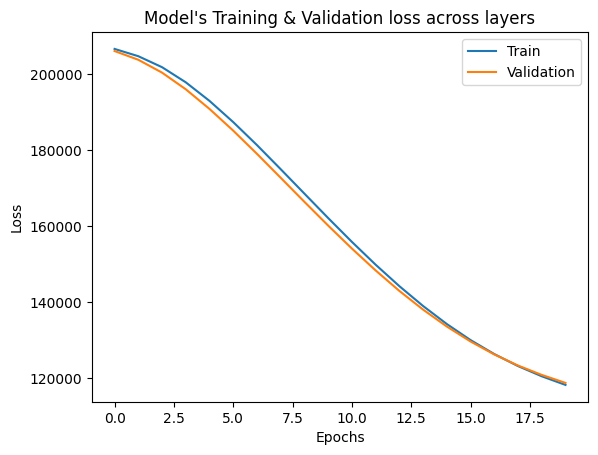

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history ['val_loss'] )
plt.title("Model's Training & Validation loss across layers")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')

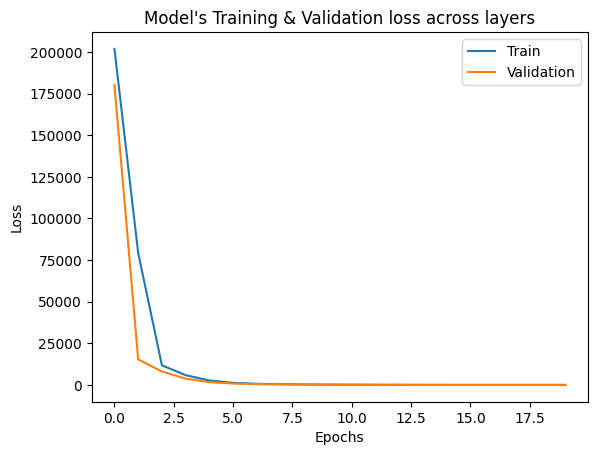

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history ['val_loss'] )
plt.title("Model's Training & Validation loss across layers")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')